In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [124]:
mhs = pd.read_csv("melb_data.csv")
mhs.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [125]:
#  Check the null values
mhs.info()

# [] - Missing Values
# Independant Variable -  Rooms, Type, Bedroom2, Bathroom, [car], Landsize, [CouncilArea]
# Dependant variable - Price 

# Numerical Attr - Rooms, Bedroom2, Bathroom, car, Landsize, Price
# Categorical Attr - Type, CouncilArea

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [126]:
# find how many categories in `Type` and `CouncilArea` columns

mhs['Type'].value_counts() # h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse;

mhs['CouncilArea'].value_counts() 
# There are various type of categories in `CouncilArea` columns. Top Three are Moreland,Boroondara, Moonee Valeey

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

In [127]:
mhs.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [0]:
# Split the train and test for model
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mhs, test_size=0.2, random_state=42)

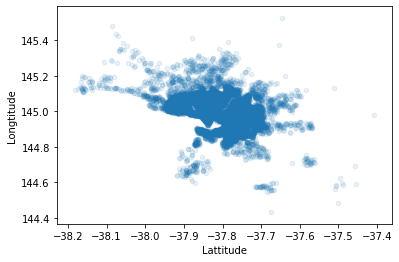

In [129]:
# Visualize where the all houses are located
housing = train_set.copy()

housing.plot(kind="scatter", x="Lattitude", y="Longtitude", alpha=0.1)

In [0]:
# find out the correlations between every pair of the attributes using corr method

corr_matrix = housing.corr()

In [131]:
corr_matrix['Price'].sort_values(ascending=False)
 # Here price is more positively correlated with Rooms, Bedroom2, Bathroom and -ve ly with Distance, Lattitude...

Price            1.000000
Rooms            0.494437
Bedroom2         0.471534
Bathroom         0.462688
Car              0.228984
Longtitude       0.203065
Postcode         0.102774
BuildingArea     0.081609
Landsize         0.047619
Propertycount   -0.045626
Distance        -0.162155
Lattitude       -0.209831
YearBuilt       -0.332337
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc10b116c18>,
      dtype=object)

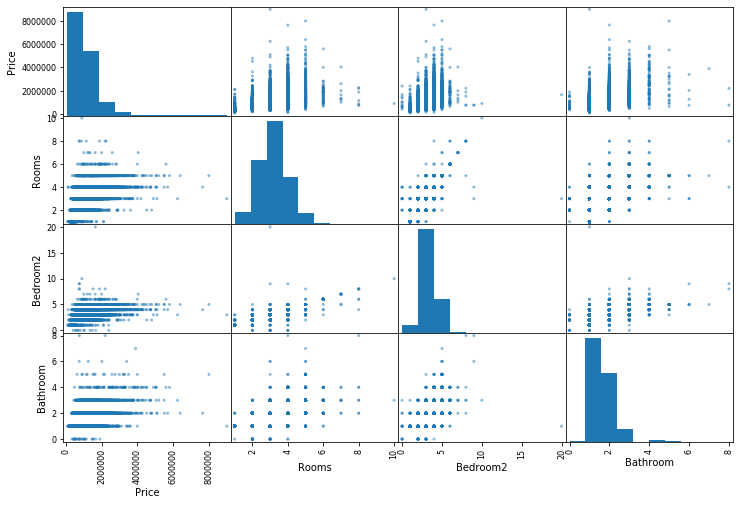

In [132]:
#  another way to check correlation b/w attributes is to use pandas scatter matrix - here we see top three attributes correlation with price values
from pandas.plotting import scatter_matrix

attributes = ["Price","Rooms","Bedroom2","Bathroom"]

scatter_matrix(housing[attributes], figsize=(12,8))

In [0]:
# Prepare the Data for machine learning algorithms

# Train Set
housing_train_set = pd.DataFrame({})
housing_train_set['Rooms'] = train_set['Rooms']
housing_train_set['Type'] = train_set['Type']
housing_train_set['Bedroom2'] = train_set['Bedroom2']
housing_train_set['Bathroom'] = train_set['Bathroom']
housing_train_set['Car'] = train_set['Car']
housing_train_set['Landsize'] = train_set['Landsize']
# housing_train_set['CouncilArea'] = mhs['CouncilArea']
# Train Labels
housing_train_labels = train_set['Price']

In [134]:
# Data cleaning - ML algorithms cannot work with missing features we need to fix it
# we already seen we have two columns having missing values - [Car, CouncilArea]
# we have so many methods to handle missing values. but here we are using `Simple Imputer` method from `sklearn` lib

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") 
# here median can only be computed on numerical attributes - we can drop category attrib (CouncilArea Columns) from training set

# housing_num = housing_train_set.drop("CouncilArea", axis=1)
housing_num = housing_train_set.drop("Type", axis=1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [135]:
imputer.statistics_

array([  3.,   3.,   1.,   2., 435.])

In [136]:
housing_num.median().values

array([  3.,   3.,   1.,   2., 435.])

In [0]:
X = imputer.transform(housing_num) # here we getting output in numpy array values if you want to put it back in pandas dataframe it is simple 

In [0]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [139]:
# Handling Categorical Attributes - using `one hot encoder` from `sklearn` lib

housing_cat = housing_train_set[['Type']]


from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
hosuing_cat_1hot = cat_encoder.fit_transform(housing_cat)
hosuing_cat_1hot

<10864x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10864 stored elements in Compressed Sparse Row format>

In [0]:
#  creating transformation pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline_train_set = Pipeline([
                                   ('imputer', SimpleImputer(strategy="median")),
                                   ('std_scaler', StandardScaler()),
])



from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['Type']

full_pipeline = ColumnTransformer([
                  ('num', num_pipeline_train_set, num_attribs),
                  ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing_train_set)

In [141]:
# Train a Model - Without Cross Validation

# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
# try it out few instances from the training set
sample_data = housing_train_set.iloc[:3]
sample_labels = housing_train_labels[:3]

sample_data_prepared = full_pipeline.transform(sample_data)

print("Prediction", lin_reg.predict(sample_data_prepared))

print("Labels", list(sample_labels))

from sklearn.metrics import mean_squared_error as mse

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mse(housing_train_labels,housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Prediction [1442297.59616217 1031198.93444031  554042.10383294]
Labels [1480000.0, 1530000.0, 690000.0]


524216.62570248265

In [143]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_train_labels)

housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mse(housing_train_labels,housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

223724.0701736062

In [144]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor()
for_reg.fit(housing_prepared, housing_train_labels)

housing_prediction = for_reg.predict(housing_prepared)
for_mse = mse(housing_train_labels,housing_prediction)
for_rmse = np.sqrt(for_mse)
for_rmse

287843.3844640984

In [145]:
# Train the model with Cross Validation
from sklearn.model_selection import cross_val_score

# Linear Regression
scores = cross_val_score(lin_reg, housing_prepared, housing_train_labels,scoring="neg_mean_squared_error", cv=10)

lin_rmse_score = np.sqrt(-scores)
print(lin_rmse_score, lin_rmse_score.mean()) 

[511638.80844239 604251.96415149 489742.09454027 464129.96410521
 516782.67650509 565094.67972274 516457.82515743 498451.19280126
 555040.42254184 510726.92664126] 523231.6554608981


In [146]:
# Decision_Tree
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_train_labels,scoring="neg_mean_squared_error", cv=10)

tree_rmse_score = np.sqrt(-tree_scores)
print(tree_rmse_score, tree_rmse_score.mean()) 

[684263.56000323 770205.90470244 714763.7702751  637129.56410085
 708933.01145066 705620.51924625 725899.05463757 659758.24756472
 759259.32895769 673455.82530906] 703928.8786247565


In [147]:
# Random_forest
for_scores = cross_val_score(for_reg, housing_prepared, housing_train_labels,scoring="neg_mean_squared_error", cv=10)

for_rmse_score = np.sqrt(-for_scores)
print(for_rmse_score, for_rmse_score.mean())

[565105.88132534 662179.93930704 576106.69908299 521547.73676164
 579702.27362572 609942.28382501 583007.41493973 545567.59427918
 625510.32340271 568499.18405315] 583716.9330602508


In [148]:
# Prepare the Test Set

# Test Set
housing_test_set = pd.DataFrame({})
housing_test_set['Rooms'] = test_set['Rooms']
housing_test_set['Type'] = test_set['Type']
housing_test_set['Bedroom2'] = test_set['Bedroom2']
housing_test_set['Bathroom'] = test_set['Bathroom']
housing_test_set['Car'] = test_set['Car']
housing_test_set['Landsize'] = test_set['Landsize']

# Test Labels
housing_test_labels = test_set['Price']

housing_test_prepared = full_pipeline.transform(housing_test_set)

final_predictions = lin_reg.predict(housing_test_prepared)
lin_mse = mse(housing_test_labels,final_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
print(final_predictions,)
print(list(housing_test_labels))

[1311659.56566364  553703.61858359  683899.96711042 ... 1588990.06228688
 1967933.79621988 1029502.38032468]
[2600000.0, 620000.0, 1000000.0, 430000.0, 392250.0, 700000.0, 439000.0, 2236000.0, 671000.0, 1870000.0, 2525000.0, 710000.0, 1330000.0, 642500.0, 731000.0, 860000.0, 429000.0, 790500.0, 2350000.0, 330000.0, 820000.0, 742000.0, 915000.0, 1562500.0, 1630000.0, 796000.0, 520000.0, 645000.0, 684000.0, 786000.0, 620000.0, 1700000.0, 270000.0, 340000.0, 772000.0, 431000.0, 1250000.0, 565500.0, 1080000.0, 558000.0, 1250000.0, 1051000.0, 1750000.0, 305000.0, 1100000.0, 900000.0, 710000.0, 610000.0, 445000.0, 907000.0, 820000.0, 2410000.0, 857000.0, 930000.0, 1800000.0, 518000.0, 831000.0, 1688000.0, 891000.0, 2440000.0, 738000.0, 1060000.0, 1270000.0, 1101000.0, 1900000.0, 1691500.0, 2100000.0, 527000.0, 2205000.0, 620000.0, 688000.0, 1580000.0, 1188000.0, 3010000.0, 1430000.0, 1670000.0, 529000.0, 960000.0, 368000.0, 3225000.0, 675000.0, 653000.0, 415500.0, 1290000.0, 980000.0, 812000

SUMMARY :

Our Model is Underfitting the training data. because we have smaller datasets that is one of the main reasons

Here are the main options to fixing this problem

  1. Selecting a more powerful model with more parameters
  2. Feed Better Features to the learning algorithms